In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import requests
import random

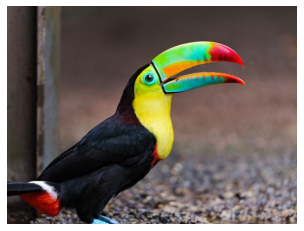

In [3]:
url = 'https://hddesktopwallpapers.in/wp-content/uploads/2015/09/toucan-bird-image.jpg'
r = requests.get(url, allow_redirects=True)
open('image.jpg', 'wb').write(r.content)

image = plt.imread("image.jpg")

# Creating a dataset which contains just one image.
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
plt.axis('off')
plt.imshow(images[0])
plt.show()

In [4]:
def plot(data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    # Plot the images given by the iterator
    fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    plt.show()

## Adding a Callback

In [7]:
def augment_color(image, red_range=(0.5, 1.5), green_range=(0.5, 1.5), blue_range=(0.5, 1.5)):
    '''Takes an input image and returns a modified version of it'''
    channel_ranges = (red_range, green_range, blue_range)
    for channel, channel_range in enumerate(channel_ranges):
      if not channel_range:
        continue  # no range set, so don't change that channel
      scale = random.uniform(channel_range[0], channel_range[1])
      image[:, :, channel] = image[:, :, channel] * scale

    image = np.clip(image, 0, 255)
    return image

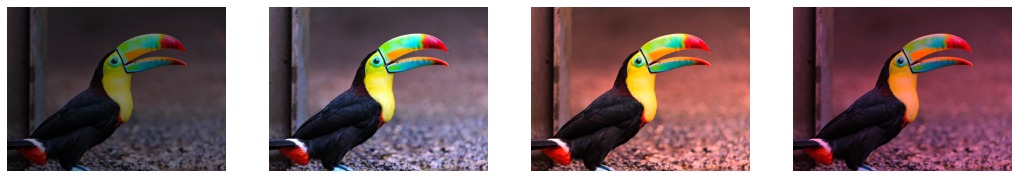

In [8]:
data_generator = ImageDataGenerator(preprocessing_function=augment_color)
plot(data_generator)

##  Extending ImageDataGenerator

In [10]:
class CustomDataGenerator(ImageDataGenerator):
  def __init__(self, red_range=None, green_range=None, blue_range=None, **kwargs):
    '''
    Custom image data generator.
    Behaves like ImageDataGenerator, but allows color augmentation.
    '''
    super().__init__(preprocessing_function=self.augment_color, **kwargs)

    self.red_range = red_range
    self.green_range = green_range
    self.blue_range = blue_range

  def augment_color(self, image):
    '''Takes an input image and returns a modified version of it'''
    channel_ranges = (self.red_range, self.green_range, self.blue_range)
    for channel, channel_range in enumerate(channel_ranges):
      if not channel_range:
        continue  # no range set, so don't change that channel
      scale = random.uniform(channel_range[0], channel_range[1])
      image[:, :, channel] = image[:, :, channel] * scale

    image = np.clip(image, 0, 255)
    return image

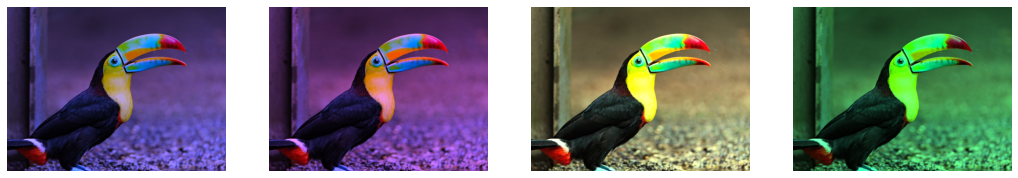

In [11]:
data_generator = CustomDataGenerator(red_range=(0.5, 1.5), green_range=(0.5, 1.5), blue_range=(0.5, 1.5), dtype=int)
plot(data_generator)